In [67]:
import pickle

with open('readings.pickle', 'rb') as handle:
    readings = pickle.load(handle)

In [68]:
readings[0]

[[-386, 14, 643],
 [-386, 14, 643],
 [-386, 14, 643],
 [-402, 12, 656],
 [-402, 12, 656],
 [-392, 12, 651],
 [-392, 12, 651],
 [-392, 12, 651],
 [-398, 19, 650],
 [-398, 19, 650],
 [-403, 21, 655],
 [-403, 21, 655],
 [-392, 15, 651],
 [-392, 15, 651],
 [-404, 17, 649],
 [-404, 17, 649],
 [-404, 17, 649],
 [-393, 21, 645],
 [-393, 21, 645],
 [-386, 16, 652],
 [-392, 23, 646],
 [-401, 16, 659],
 [-398, 21, 655],
 [-404, 12, 656],
 [-404, 12, 656],
 [-387, 23, 656],
 [-404, 20, 651],
 [-396, 19, 662],
 [-392, 17, 644],
 [-396, 19, 652],
 [-397, 15, 658],
 [-402, 15, 649],
 [-402, 15, 649],
 [-399, 2, 658],
 [-393, 29, 657],
 [-391, 14, 643],
 [-397, 15, 653],
 [-398, 19, 650],
 [-398, 21, 655],
 [-398, 19, 650],
 [-398, 19, 650],
 [-404, 7, 656],
 [-393, 8, 652],
 [-396, 14, 652],
 [-404, 17, 658],
 [-402, 17, 666],
 [-396, 26, 664],
 [-402, 23, 661],
 [-401, 8, 659],
 [-401, 8, 659],
 [-398, 16, 659],
 [-399, 15, 666],
 [-396, 21, 655],
 [-404, 25, 656],
 [-405, 14, 659],
 [-396, 16, 650

In [69]:
import numpy as np

readings = np.asarray(readings[0], dtype=np.float32)

In [70]:
readings.shape

(5366, 3)

In [71]:
np.min(readings, axis=0)

array([-469., -196.,  630.], dtype=float32)

In [72]:
np.max(readings, axis=0)

array([-256.,   33.,  722.], dtype=float32)

In [73]:
xy = readings[:, [0, 1]]

In [74]:
print(np.max(xy, axis=0))
print(np.min(xy, axis=0))

[-256.   33.]
[-469. -196.]


(-600.0, 600.0)

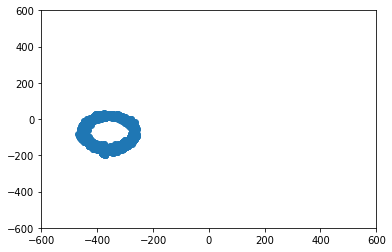

In [75]:
import matplotlib.pyplot as plt

plt.scatter(xy[:, 0], xy[:, 1])
plt.xlim(-600, 600)
plt.ylim(-600, 600)

In [76]:
mag_min = np.min(xy, axis=0)
mag_max = np.max(xy, axis=0)

calibration_offset = (mag_max + mag_min) / 2

avg_deltas = (mag_max - mag_min) / 2
avg_delta = np.sum(avg_deltas) / 3

calibration_scale = avg_delta / avg_deltas

corrected = (xy - calibration_offset) * calibration_scale

In [77]:
corrected

array([[-16.255085,  61.442505],
       [-16.255085,  61.442505],
       [-16.255085,  61.442505],
       ...,
       [ 45.998432, -27.9869  ],
       [ 45.998432, -27.9869  ],
       [ 46.69014 , -27.343523]], dtype=float32)

(-100.0, 100.0)

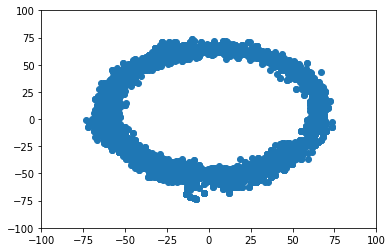

In [78]:
plt.scatter(corrected[:, 0], corrected[:, 1])
plt.xlim(-100, 100)
plt.ylim(-100, 100)

In [87]:
def outlier_removal(readings):
    x_diff = np.append(0.0,np.diff(readings[:, 0])) # looking for outliers
    stdev_amt = 2.0 # standard deviation multiplier
    x_outliers = np.where(np.abs(x_diff)>np.abs(np.mean(x_diff))+\
                          (stdev_amt*np.std(x_diff)))
    x_inliers  = np.where(np.abs(x_diff)<np.abs(np.mean(x_diff))+\
                          (stdev_amt*np.std(x_diff)))
    y_diff     = np.append(0.0,np.diff(readings[:, 1])) # looking for outliers
    y_outliers = np.where(np.abs(y_diff)>np.abs(np.mean(y_diff))+\
                          (stdev_amt*np.std(y_diff)))
    y_inliers  = np.abs(y_diff)<np.abs(np.mean(y_diff))+\
                 (stdev_amt*np.std(y_diff))
    if len(x_outliers)!=0:
        readings[:, x_outliers] = np.nan # null outlier
        readings[:, x_outliers] = np.nan # null outlier
    if len(y_outliers)!=0:
        readings[:, y_outliers] = np.nan # null outlier
        readings[:, y_outliers] = np.nan # null outlier
    return readings

In [88]:
inliers = outlier_removal(xy.copy())

IndexError: index 3 is out of bounds for axis 1 with size 2

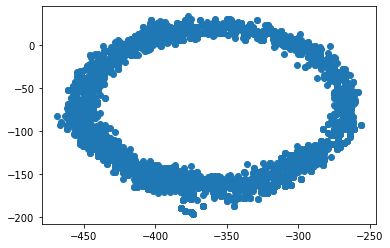

In [84]:
plt.scatter(x_inliner, y_inlier)

In [ ]:
mag_min = np.min(xy, axis=0)
mag_max = np.max(xy, axis=0)

calibration_offset = (mag_max + mag_min) / 2

avg_deltas = (mag_max - mag_min) / 2
avg_delta = np.sum(avg_deltas) / 3

calibration_scale = avg_delta / avg_deltas

corrected = (xy - calibration_offset) * calibration_scale